In [1]:
import tensorflow as tf
import keras
import sys

In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
import matplotlib.pyplot as plt

label = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


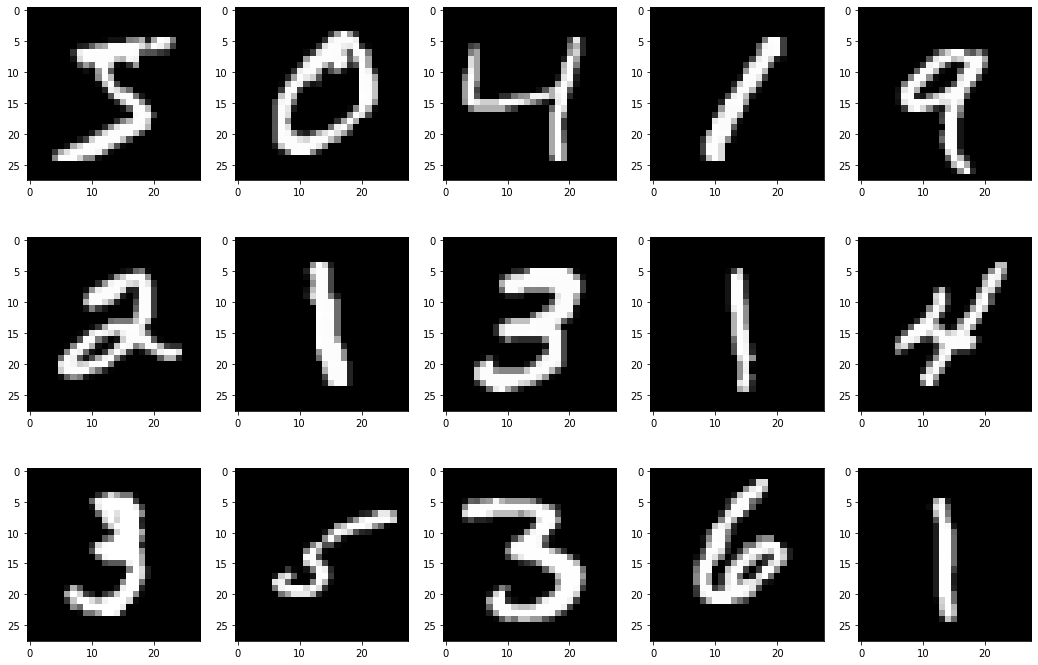

In [6]:
figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)
plt.gray()
print("label = {}".format(y_train[0:15]))

col = 0
for row in range(3):
    col = row * 5
    axes[row][0].imshow(X_train[col])
    axes[row][1].imshow(X_train[col+1])
    axes[row][2].imshow(X_train[col+2])
    axes[row][3].imshow(X_train[col+3])
    axes[row][4].imshow(X_train[col+4])

label = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


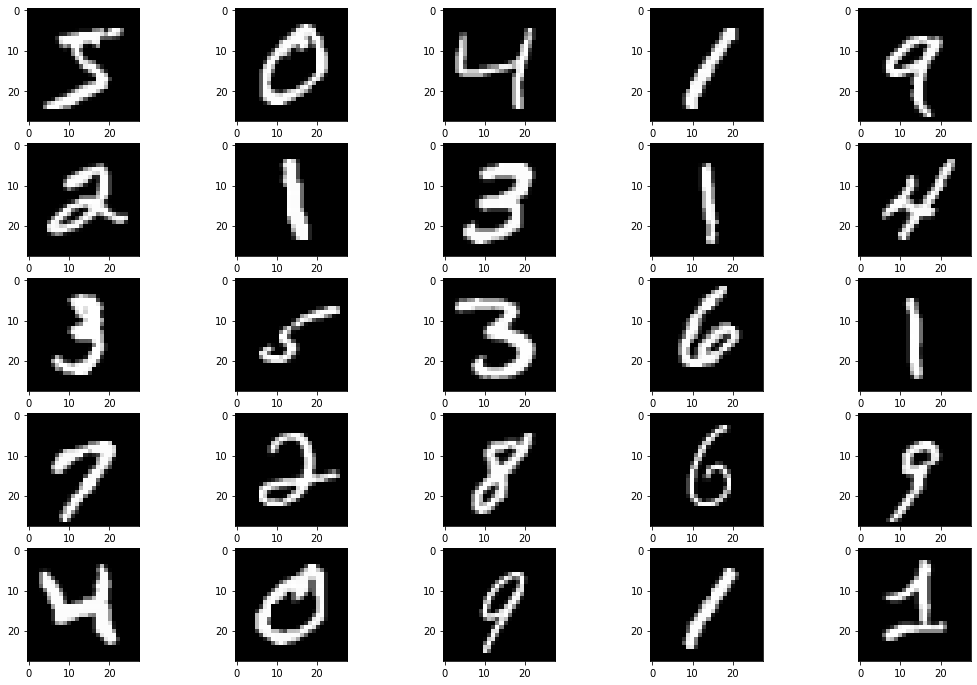

In [7]:
figure, axes = plt.subplots(nrows=5, ncols=5)
figure.set_size_inches(18, 12)
plt.gray()
print("label = {}".format(y_train[0:15]))

col = 0
for row in range(5):
    col = row * 5
    axes[row][0].imshow(X_train[col])
    axes[row][1].imshow(X_train[col+1])
    axes[row][2].imshow(X_train[col+2])
    axes[row][3].imshow(X_train[col+3])
    axes[row][4].imshow(X_train[col+4])

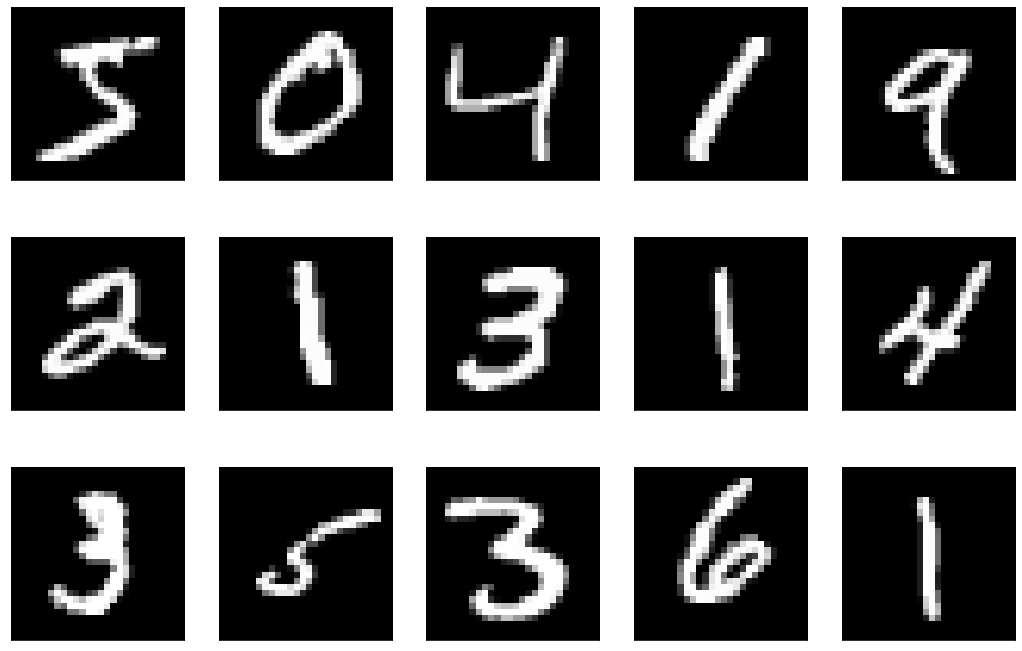

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(18,12),
                        subplot_kw= {'xticks':(), 'yticks':() })

for image, ax in zip( X_train, axes.ravel() ):
    ax.imshow(image) # 이미지 표시

In [9]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [10]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [12]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 1s 669us/step - loss: 12.2319 - accuracy: 0.1391 - val_loss: 2.3023 - val_accuracy: 0.1144
Epoch 2/10
1875/1875 [==============================] - 1s 633us/step - loss: 2.2388 - accuracy: 0.1574 - val_loss: 2.2868 - val_accuracy: 0.1233
Epoch 3/10
1875/1875 [==============================] - 1s 628us/step - loss: 2.2843 - accuracy: 0.1244 - val_loss: 2.2965 - val_accuracy: 0.1160
Epoch 4/10
1875/1875 [==============================] - 1s 607us/step - loss: 2.1912 - accuracy: 0.1832 - val_loss: 2.1030 - val_accuracy: 0.2080
Epoch 5/10
1875/1875 [==============================] - 1s 628us/step - loss: 2.1053 - accuracy: 0.2134 - val_loss: 2.0799 - val_accuracy: 0.2031
Epoch 6/10
1875/1875 [==============================] - 1s 599us/step - loss: 2.2542 - accuracy: 0.1670 - val_loss: 2.2203 - val_accuracy: 0.1681
Epoch 7/10
1875/1875 [==============================] - 1s 587us/step - loss: 2.2206 - accuracy: 0.1749 - val_loss: 2.1572 

In [13]:
print('## training loss and acc ##')
print(hist.history['loss'])        # 'val_loss' : 평가셋 손실값
print(hist.history['accuracy'])    # 'val_acc'  : 평가셋 정확도

## training loss and acc ##
[12.231870651245117, 2.2388179302215576, 2.284254789352417, 2.1911585330963135, 2.105278491973877, 2.254180431365967, 2.220649242401123, 2.2602522373199463, 2.2770822048187256, 2.252061367034912]
[0.13908334076404572, 0.1573999971151352, 0.12443333119153976, 0.1832166612148285, 0.2134000062942505, 0.16696666181087494, 0.1748500019311905, 0.14196667075157166, 0.13484999537467957, 0.13508333265781403]


In [14]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

313/313 [==============================] - 0s 448us/step - loss: 2.3308 - accuracy: 0.1534
## evaluation loss and_metrics ##
[2.330763578414917, 0.1534000039100647]


In [15]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [16]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1302 - accuracy: 0.1893 - val_loss: 2.0866 - val_accuracy: 0.2076
Epoch 2/10
1875/1875 [==============================] - 2s 942us/step - loss: 2.0290 - accuracy: 0.2327 - val_loss: 1.9911 - val_accuracy: 0.2547
Epoch 3/10
1875/1875 [==============================] - 2s 964us/step - loss: 1.9313 - accuracy: 0.2642 - val_loss: 1.8837 - val_accuracy: 0.2817
Epoch 4/10
1875/1875 [==============================] - 2s 946us/step - loss: 1.8449 - accuracy: 0.2762 - val_loss: 1.8271 - val_accuracy: 0.2739
Epoch 5/10
1875/1875 [==============================] - 2s 973us/step - loss: 1.8036 - accuracy: 0.2753 - val_loss: 1.7987 - val_accuracy: 0.2728
Epoch 6/10
1875/1875 [==============================] - 2s 957us/step - loss: 1.7825 - accuracy: 0.2749 - val_loss: 1.7847 - val_accuracy: 0.2724
Epoch 7/10
1875/1875 [==============================] - 2s 940us/step - loss: 1.7693 - accuracy: 0.2770 - val_loss: 1.7755 - v

In [17]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

313/313 [==============================] - 0s 726us/step - loss: 1.7549 - accuracy: 0.2907
## evaluation loss and_metrics ##
[1.7548558712005615, 0.2906999886035919]


In [18]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 2s 956us/step - loss: 1.7036 - accuracy: 0.3092 - val_loss: 1.6200 - val_accuracy: 0.3551
Epoch 2/10
1875/1875 [==============================] - 2s 953us/step - loss: 1.5643 - accuracy: 0.3742 - val_loss: 1.5339 - val_accuracy: 0.4024
Epoch 3/10
1875/1875 [==============================] - 2s 944us/step - loss: 1.4747 - accuracy: 0.4159 - val_loss: 1.4534 - val_accuracy: 0.4207
Epoch 4/10
1875/1875 [==============================] - 2s 934us/step - loss: 1.4253 - accuracy: 0.4239 - val_loss: 1.4260 - val_accuracy: 0.4265
Epoch 5/10
1875/1875 [==============================] - 2s 935us/step - loss: 1.4035 - accuracy: 0.4284 - val_loss: 1.4105 - val_accuracy: 0.4242
Epoch 6/10
1875/1875 [==============================] - 2s 940us/step - loss: 1.3890 - accuracy: 0.4336 - val_loss: 1.3985 - val_accuracy: 0.4357
Epoch 7/10
1875/1875 [==============================] - 2s 940us/step - loss: 1.3771 - accuracy: 0.4398 - val_loss: 1.3869 -

In [19]:
model = Sequential()
model.add( Dense(units=64, input_dim=28*28, activation='tanh')) #입력층(28*28=784노드) - 은닉층(64개노드)
model.add( Dense(32))
model.add( Activation('tanh') )
model.add( Dense(32))
model.add( Activation('tanh') )
# 한줄로 한다면 
# model.add(Dense(32, activation='tanh'))

model.add(Dense(units=10, activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [21]:
# hist = model.fit(X_train, y_train, epochs=5, batch_size=32)
hist = model.fit(X_train, y_train, 
                 validation_data=(X_test, y_test),
                 epochs=10,
                 batch_size=100,
                 verbose=1)

Epoch 1/10
600/600 [==============================] - 1s 982us/step - loss: 1.1582 - accuracy: 0.7177 - val_loss: 0.6952 - val_accuracy: 0.8396
Epoch 2/10
600/600 [==============================] - 1s 884us/step - loss: 0.5824 - accuracy: 0.8582 - val_loss: 0.4726 - val_accuracy: 0.8846
Epoch 3/10
600/600 [==============================] - 0s 826us/step - loss: 0.4382 - accuracy: 0.8877 - val_loss: 0.3847 - val_accuracy: 0.9000
Epoch 4/10
600/600 [==============================] - 1s 834us/step - loss: 0.3707 - accuracy: 0.9007 - val_loss: 0.3384 - val_accuracy: 0.9089
Epoch 5/10
600/600 [==============================] - 1s 836us/step - loss: 0.3308 - accuracy: 0.9086 - val_loss: 0.3093 - val_accuracy: 0.9159
Epoch 6/10
600/600 [==============================] - 0s 790us/step - loss: 0.3033 - accuracy: 0.9156 - val_loss: 0.2872 - val_accuracy: 0.9204
Epoch 7/10
600/600 [==============================] - 0s 828us/step - loss: 0.2822 - accuracy: 0.9213 - val_loss: 0.2704 - val_accuracy:

In [22]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

## training loss and acc ##
[1.158191204071045, 0.5823785662651062, 0.4382431209087372, 0.37074825167655945, 0.3308456838130951, 0.3033105432987213, 0.28215575218200684, 0.26484423875808716, 0.24983838200569153, 0.2369157373905182]
[0.7177000045776367, 0.8581666946411133, 0.8876833319664001, 0.9006500244140625, 0.9086166620254517, 0.9155833125114441, 0.9212666749954224, 0.9247833490371704, 0.9289500117301941, 0.9327166676521301]


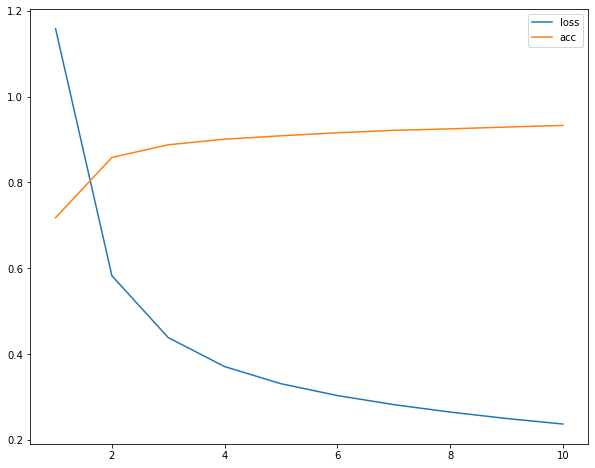

In [24]:
plt.figure(figsize=(10,8),facecolor='white')
x_lim = range(1,11)
plt.plot(x_lim,  hist.history['loss'])
plt.plot(x_lim,  hist.history['accuracy'])
plt.legend(['loss','acc'])

In [25]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)  # 최종 데이터 loss와 정확도(accuracy)

313/313 [==============================] - 0s 777us/step - loss: 0.2336 - accuracy: 0.9342
## evaluation loss and_metrics ##
[0.23363147675991058, 0.9341999888420105]


In [34]:
## 은닉층 1 - 64   activation:relu
model = Sequential()
model.add( Dense(units=64, input_dim=28*28, activation='relu')) #입력층(28*28=784노드) - 은닉층(64개노드)
model.add( Dense(64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

# hist = model.fit(X_train, y_train, epochs=5, batch_size=32)
hist = model.fit(X_train, y_train, 
                 validation_data=(X_test, y_test),
                 epochs=10,
                 batch_size=100,
                 verbose=1)
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Epoch 1/10
600/600 [==============================] - 1s 945us/step - loss: 1.2412 - accuracy: 0.6809 - val_loss: 0.5572 - val_accuracy: 0.8644
Epoch 2/10
600/600 [==============================] - 0s 818us/step - loss: 0.4734 - accuracy: 0.8739 - val_loss: 0.3827 - val_accuracy: 0.8958
Epoch 3/10
600/600 [==============================] - 0s 788us/step - loss: 0.3738 - accuracy: 0.8953 - val_loss: 0.3273 - val_accuracy: 0.9052
Epoch 4/10
600/600 [==============================] - 0s 769us/step - loss: 0.3316 - accuracy: 0.9050 - val_loss: 0.3004 - val_accuracy: 0.9149
Epoch 5/10
600/600 [==============================] - 0s 778us/step - loss: 0.3052 - accuracy: 0.9121 - val_loss: 0.2794 - val_accuracy: 0.9218
Epoch 6/10
600/600 [==============================] - 0s 771us/step - loss: 0.2858 - accuracy: 0.9177 - val_loss: 0.2644 - val_accuracy: 0.9262
Epoch 7/10
600/600 [==============================] - 0s 773us/step - loss: 0.2699 - accuracy: 0.9226 - val_loss: 0.2515 - val_accuracy:

In [33]:
## 은닉층 2 - 64, 32   activation:relu
model = Sequential()
model.add( Dense(units=64, input_dim=28*28, activation='relu')) #입력층(28*28=784노드) - 은닉층(64개노드)
model.add( Dense(64, activation='relu'))
model.add( Dense(32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

# hist = model.fit(X_train, y_train, epochs=5, batch_size=32)
hist = model.fit(X_train, y_train, 
                 validation_data=(X_test, y_test),
                 epochs=10,
                 batch_size=100,
                 verbose=1)
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Epoch 1/10
600/600 [==============================] - 1s 971us/step - loss: 1.4234 - accuracy: 0.5994 - val_loss: 0.6056 - val_accuracy: 0.8403
Epoch 2/10
600/600 [==============================] - 0s 811us/step - loss: 0.4798 - accuracy: 0.8664 - val_loss: 0.3828 - val_accuracy: 0.8887
Epoch 3/10
600/600 [==============================] - 0s 828us/step - loss: 0.3661 - accuracy: 0.8948 - val_loss: 0.3219 - val_accuracy: 0.9061
Epoch 4/10
600/600 [==============================] - 1s 841us/step - loss: 0.3189 - accuracy: 0.9087 - val_loss: 0.2879 - val_accuracy: 0.9159
Epoch 5/10
600/600 [==============================] - 0s 817us/step - loss: 0.2869 - accuracy: 0.9180 - val_loss: 0.2606 - val_accuracy: 0.9227
Epoch 6/10
600/600 [==============================] - 0s 788us/step - loss: 0.2620 - accuracy: 0.9254 - val_loss: 0.2417 - val_accuracy: 0.9280
Epoch 7/10
600/600 [==============================] - 0s 799us/step - loss: 0.2414 - accuracy: 0.9310 - val_loss: 0.2285 - val_accuracy:

In [35]:
## 은닉층 2 - 64, 32 epoch 30  activation:relu
model = Sequential()
model.add( Dense(units=64, input_dim=28*28, activation='relu')) #입력층(28*28=784노드) - 은닉층(64개노드)
model.add( Dense(64, activation='relu'))
model.add( Dense(32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

# hist = model.fit(X_train, y_train, epochs=5, batch_size=32)
hist = model.fit(X_train, y_train, 
                 validation_data=(X_test, y_test),
                 epochs=30,
                 batch_size=100,
                 verbose=1)
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Epoch 1/30
600/600 [==============================] - 1s 989us/step - loss: 1.3685 - accuracy: 0.6262 - val_loss: 0.5267 - val_accuracy: 0.8696
Epoch 2/30
600/600 [==============================] - 0s 833us/step - loss: 0.4340 - accuracy: 0.8822 - val_loss: 0.3546 - val_accuracy: 0.9014
Epoch 3/30
600/600 [==============================] - 1s 892us/step - loss: 0.3384 - accuracy: 0.9040 - val_loss: 0.3021 - val_accuracy: 0.9145
Epoch 4/30
600/600 [==============================] - 0s 833us/step - loss: 0.2974 - accuracy: 0.9146 - val_loss: 0.2749 - val_accuracy: 0.9225
Epoch 5/30
600/600 [==============================] - 0s 830us/step - loss: 0.2693 - accuracy: 0.9219 - val_loss: 0.2517 - val_accuracy: 0.9279
Epoch 6/30
600/600 [==============================] - 0s 816us/step - loss: 0.2477 - accuracy: 0.9278 - val_loss: 0.2320 - val_accuracy: 0.9328
Epoch 7/30
600/600 [==============================] - 1s 848us/step - loss: 0.2298 - accuracy: 0.9326 - val_loss: 0.2177 - val_accuracy:

In [36]:
## 은닉층 2 - 64, 32 epoch 100  activation:relu
model = Sequential()
model.add( Dense(units=64, input_dim=28*28, activation='relu')) #입력층(28*28=784노드) - 은닉층(64개노드)
model.add( Dense(64, activation='relu'))
model.add( Dense(32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

# hist = model.fit(X_train, y_train, epochs=5, batch_size=32)
hist = model.fit(X_train, y_train, 
                 validation_data=(X_test, y_test),
                 epochs=100,
                 batch_size=100,
                 verbose=1)
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Epoch 1/100
600/600 [==============================] - 1s 951us/step - loss: 1.3836 - accuracy: 0.6017 - val_loss: 0.6447 - val_accuracy: 0.8265
Epoch 2/100
600/600 [==============================] - 0s 771us/step - loss: 0.5124 - accuracy: 0.8569 - val_loss: 0.4003 - val_accuracy: 0.8889
Epoch 3/100
600/600 [==============================] - 1s 841us/step - loss: 0.3723 - accuracy: 0.8962 - val_loss: 0.3217 - val_accuracy: 0.9066
Epoch 4/100
600/600 [==============================] - 0s 784us/step - loss: 0.3158 - accuracy: 0.9097 - val_loss: 0.2850 - val_accuracy: 0.9167
Epoch 5/100
600/600 [==============================] - 0s 822us/step - loss: 0.2833 - accuracy: 0.9189 - val_loss: 0.2596 - val_accuracy: 0.9253
Epoch 6/100
600/600 [==============================] - 0s 792us/step - loss: 0.2606 - accuracy: 0.9251 - val_loss: 0.2418 - val_accuracy: 0.9283
Epoch 7/100
600/600 [==============================] - 1s 832us/step - loss: 0.2421 - accuracy: 0.9306 - val_loss: 0.2275 - val_ac

600/600 [==============================] - 0s 801us/step - loss: 0.0470 - accuracy: 0.9870 - val_loss: 0.0939 - val_accuracy: 0.9718
Epoch 58/100
600/600 [==============================] - 0s 817us/step - loss: 0.0462 - accuracy: 0.9872 - val_loss: 0.0933 - val_accuracy: 0.9724
Epoch 59/100
600/600 [==============================] - 0s 832us/step - loss: 0.0452 - accuracy: 0.9875 - val_loss: 0.0922 - val_accuracy: 0.9729
Epoch 60/100
600/600 [==============================] - 1s 839us/step - loss: 0.0441 - accuracy: 0.9880 - val_loss: 0.0921 - val_accuracy: 0.9725
Epoch 61/100
600/600 [==============================] - 0s 806us/step - loss: 0.0434 - accuracy: 0.9881 - val_loss: 0.0959 - val_accuracy: 0.9705
Epoch 62/100
600/600 [==============================] - 0s 829us/step - loss: 0.0423 - accuracy: 0.9887 - val_loss: 0.0923 - val_accuracy: 0.9723
Epoch 63/100
600/600 [==============================] - 0s 814us/step - loss: 0.0416 - accuracy: 0.9890 - val_loss: 0.0929 - val_accuracy

313/313 [==============================] - 0s 763us/step - loss: 0.0996 - accuracy: 0.9737
## evaluation loss and_metrics ##
[0.09959646314382553, 0.9736999869346619]
